In [6]:
from molmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [7]:
def CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', sigmoidy = False):
    '''
    Forward prop. Feature importance
    '''
    
    if task_type == 'classification':
        f = log_loss
    else:
        f = mean_squared_error
        
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    grid = mp.plot_grid()
    Y_true = dfY.values
    df_grid = mp.df_grid.sort_values(['y', 'x']).reset_index(drop=True)
    Y_prob = model.predict(arrX)
    N, W, H, C = arrX.shape
    
    if (sigmoidy) & (task_type == 'classification'):
        Y_prob = sigmoid(Y_prob)

    final_res = {}
    for k, col in enumerate(dfY.columns):
        print('calculating feature importance for %s ...' % col)
        
        results = []
        loss = f(Y_true[:, k].tolist(), Y_prob[:, k].tolist())
        for i in tqdm(range(len(df_grid)), ascii= True):
            ts = df_grid.iloc[i]
            y = ts.y
            x = ts.x
            X1 = copy(arrX)
            X1[:, y, x,:] = np.full(X1[:, y, x,:].shape, fill_value = arrX.min())
            #Y1 = model.predict(X1)
            Y_pred_prob = model.predict(X1)
            if (sigmoidy) & (task_type == 'classification'):
                Y_pred_prob = sigmoid(Y_pred_prob)
            mut_loss = f(Y_true[:, k].tolist(), Y_pred_prob[:, k].tolist()) 
            res =  mut_loss - loss # if res > 0, important, othervise, not important
            results.append(res)
            
        final_res.update({col:results})
    df = pd.DataFrame(final_res)
    df.columns = df.columns + '_importance'
    df = df_grid.join(df)
    return df

In [173]:
dfx0 = pd.read_excel('./CRC.xlsx', sheet_name='data')
dfx0 = dfx0[dfx0.columns[1:]]
dfx = np.log(dfx0 + 1e-8)

feature_groups_df = pd.read_excel('./CRC.xlsx', sheet_name='feature_info')
feature_group_list = feature_groups_df.Group.tolist()

dfy_all = pd.read_excel('./CRC.xlsx', sheet_name='sample_info')
dfy = pd.get_dummies(dfy_all['Group'])


X = dfx.values.astype(float)
Y = dfy.values.astype(float)

In [9]:
country_idx = dfy_all.groupby(['Country']).apply(lambda x:x.index.tolist())
country_names = country_idx.index.tolist()

In [10]:
country_names

['AUS', 'CHI', 'FRA', 'GER', 'USA']

In [11]:
model_save_path = './model'
mp = loadmap('./model/aggmap.mp')

In [12]:
all_importance = {}
for train_country in country_names:

    train_idx = country_idx.loc[train_country]

    trainx = X[train_idx]
    trainY = Y[train_idx]
    
    trainX = mp.batch_transform(trainx, scale_method = 'standard')   
    
    model_name = os.path.join(model_save_path, '%s.h5' % train_country)
        
    model = load_model(model_name)
    arrX = trainX
    dfY = pd.DataFrame(trainY, columns = dfy.columns)
    
    df_imp = CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', sigmoidy = False)
    all_importance.update({train_country: df_imp})

100%|##########| 109/109 [00:02<00:00, 39.96it/s]


2020-10-26 19:07:56,404 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-26 19:07:56,429 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 3/870 [00:00<00:37, 23.07it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:36, 23.59it/s]

calculating feature importance for CTR ...


100%|##########| 128/128 [00:00<00:00, 472.30it/s]


2020-10-26 19:09:16,574 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-26 19:09:16,597 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:33, 26.16it/s]

calculating feature importance for CTR ...


100%|##########| 114/114 [00:00<00:00, 463.42it/s]


2020-10-26 19:10:30,278 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-26 19:10:30,301 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:36, 24.06it/s]

calculating feature importance for CTR ...


100%|##########| 120/120 [00:00<00:00, 416.21it/s]


2020-10-26 19:11:49,104 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-26 19:11:49,127 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:37, 23.10it/s]

calculating feature importance for CTR ...


100%|##########| 104/104 [00:00<00:00, 356.16it/s]


2020-10-26 19:13:14,978 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-26 19:13:15,004 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:36, 23.65it/s]

calculating feature importance for CTR ...


100%|##########| 870/870 [00:41<00:00, 21.18it/s]


In [13]:
res = []
for k, v in all_importance.items():
    ts = v[['CTR_importance']]
    ts.columns =  [k]
    res.append(ts)
    
dfi = pd.concat(res, axis=1)

In [384]:
dfi = dfi.rename(columns = {'AUS':"AT", 'CHI':'CN', 'FRA':'FR', 'GER':'DE', 'USA':'US'})

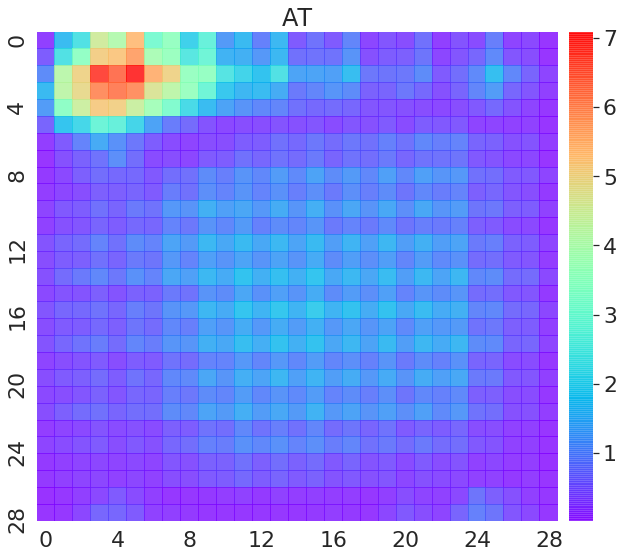

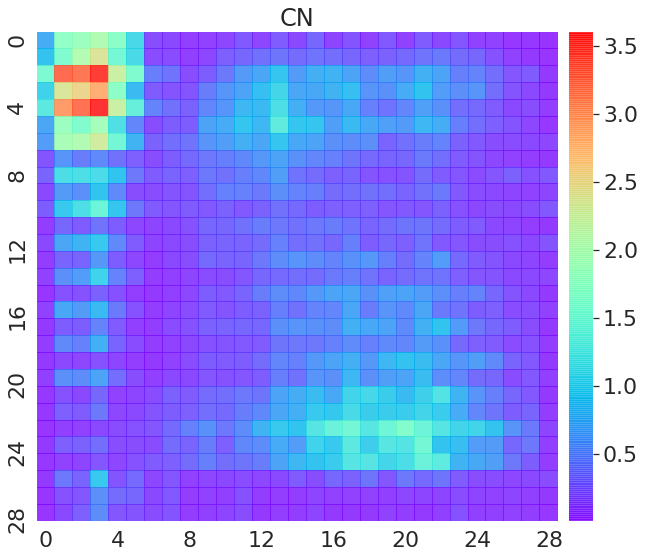

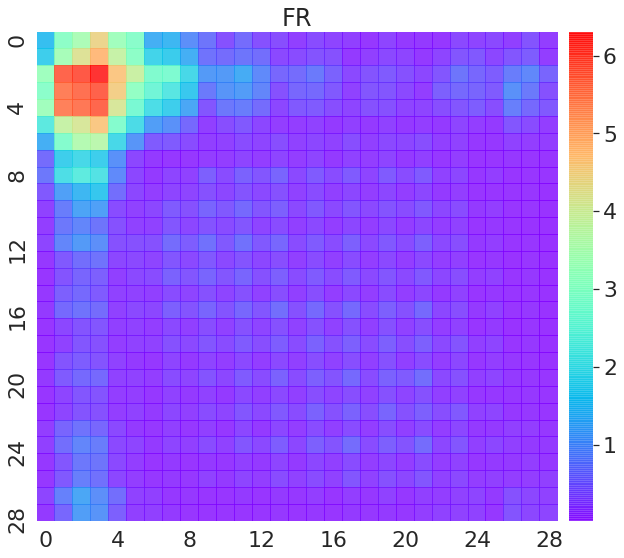

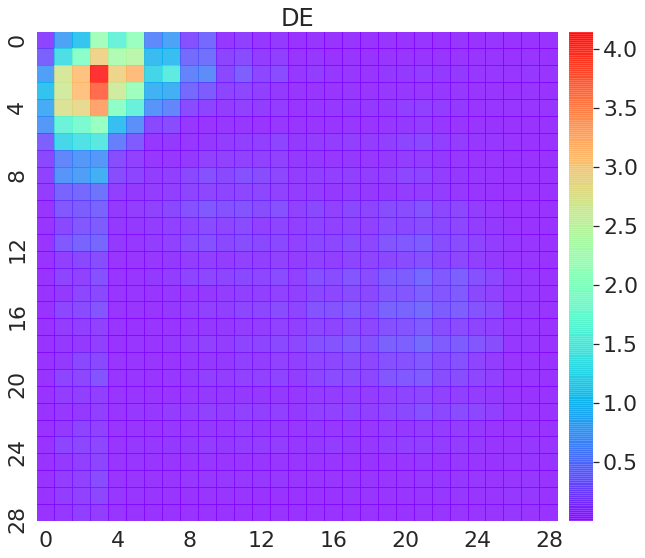

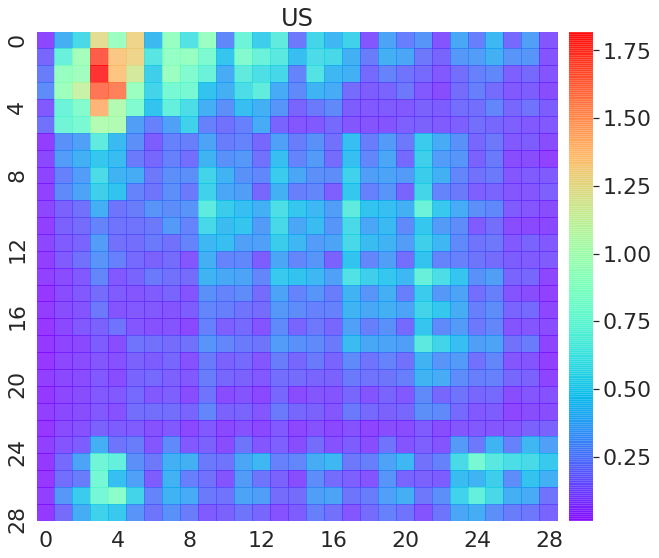

In [385]:
for country in dfi.columns:    
    sns.set(style='white',  font='sans-serif', font_scale=2)
    fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

    IMPM = dfi[country].values.reshape(*mp.fmap_shape)
    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=4, ax =ax,
                yticklabels=4, #vmin = 0.2,
                cbar_kws = {'fraction':0.046, 'pad':0.02})

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.title(country)

    plt.subplots_adjust(wspace = 0.18)

    plt.savefig('./model/%s.svg' % country, dpi = 400, bbox_inches="tight")


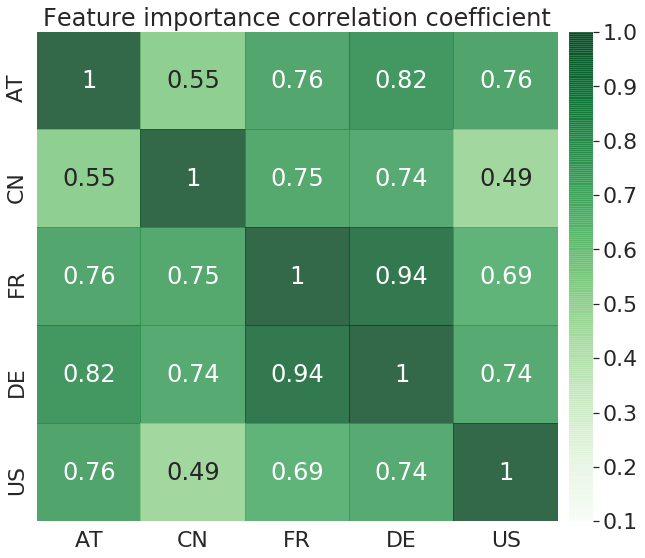

In [386]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = dfi.corr()
sns.heatmap(IMPM,  
            yticklabels = IMPM.columns, # xticklabels=4,yticklabels=4,
            xticklabels = IMPM.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'pad':0.02})


ax.set_title("Feature importance correlation coefficient")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplots_adjust(wspace = 0.18)
plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")

In [389]:
df_save = all_importance['CHI'][['x', 'y', 'v', 'Subtypes', 'colors', ]].join(dfi)

In [390]:
df_save = df_save.set_index('v')

In [391]:
df_save['5_countries_average_importance'] = dfi.mean(axis=1).values

In [436]:
df_save = df_save.sort_values('5_countries_average_importance', ascending = False)

In [393]:
df_save.sort_values('5_countries_average_importance', ascending = False).head(15)[['x', 'y',  'Subtypes', '5_countries_average_importance']]

,x,y,Subtypes,5_countries_average_importance
v,,,,
unknown Dialister [meta_mOTU_v2_5867],3,2,cluster_03,4.528148
Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754],3,3,cluster_03,4.015248
Alloprevotella tannerae [ref_mOTU_v2_4636],3,4,cluster_03,3.865421
Parvimonas sp. [ref_mOTU_v2_5245],2,2,cluster_03,3.640268
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],4,2,cluster_02,3.512162
Parvimonas sp. [ref_mOTU_v2_4961],2,3,cluster_03,3.467819
Prevotella oris [ref_mOTU_v2_0520],2,4,cluster_03,3.401658
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776],3,1,cluster_03,3.395282
Clostridiales bacterium S5-A14a [meta_mOTU_v2_5486],5,2,cluster_02,3.385131


In [21]:
from scipy.stats import pearsonr

In [22]:
pccs = []
ps = []
for i in dfi.columns:
    for j in dfi.columns:
        pcc, p = pearsonr(dfi[i], dfi[j])
        pccs.append(pcc)
        ps.append(p)

In [23]:
df1 = pd.DataFrame(np.array(pccs).reshape(5,5), columns = dfi.columns, index = dfi.columns)

In [24]:
df2 = pd.DataFrame(np.array(ps).reshape(5,5), columns = dfi.columns, index = dfi.columns)

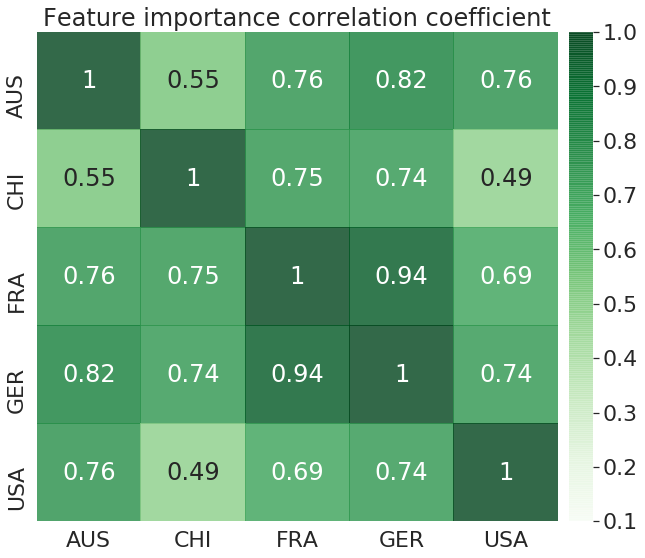

In [25]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))


sns.heatmap(df1,  
            yticklabels = df1.columns, # xticklabels=4,yticklabels=4,
            xticklabels = df1.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'pad':0.02})


ax.set_title("Feature importance correlation coefficient")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplots_adjust(wspace = 0.18)
plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")

In [361]:
f1 = df_save.sort_values('5_countries_average_importance', ascending = False)

In [362]:
#f1 = f1.head(20)
#f = f1.reset_index(drop = True)
#f.index = f.index.map(lambda x:'microbe-%s' % str(x+1).zfill(2))

f = f1.head(20)
f.index = f.index.map(lambda x:x.split(' [')[-1].replace(']',''))

In [363]:
f

,x,y,Subtypes,colors,AUS,CHI,FRA,GER,USA,5_countries_average_importance
v,,,,,,,,,,
meta_mOTU_v2_5867,3,2,cluster_03,#00fff6,6.834330,3.545717,6.302997,4.139982,1.817714,4.528148
ref_mOTU_v2_0754,3,3,cluster_03,#00fff6,6.011940,2.851796,5.833544,3.756191,1.622768,4.015248
ref_mOTU_v2_4636,3,4,cluster_03,#00fff6,5.173644,3.603015,5.775667,3.354819,1.419961,3.865421
ref_mOTU_v2_5245,2,2,cluster_03,#00fff6,5.017513,3.200214,5.917089,3.113350,0.953175,3.640268
ref_mOTU_v2_0429,4,2,cluster_02,#08ff00,6.368078,2.229420,4.673925,2.931709,1.357680,3.512162
ref_mOTU_v2_4961,2,3,cluster_03,#00fff6,4.916447,2.546302,5.668442,3.093090,1.114816,3.467819
ref_mOTU_v2_0520,2,4,cluster_03,#00fff6,4.459039,3.232640,5.614510,2.876697,0.825405,3.401658
ref_mOTU_v2_0776,3,1,cluster_03,#00fff6,5.111094,2.387607,4.830620,2.951690,1.695398,3.395282
meta_mOTU_v2_5486,5,2,cluster_02,#08ff00,7.088583,1.581366,3.910717,3.162534,1.182453,3.385131


In [364]:
from statannot import add_stat_annotation
cols = f1.index.tolist()
ncols = f.index.tolist()

y  = 'log10 Intensity'
hue = 'Group' 
x = 'Microbial species'


all_data = []
for col, ncol in zip(cols, ncols):
    v = dfx[col]
    #x = mp.StandardScaler(x,  x.mean(), x.std())
    dfd = v.to_frame(name = y).join(dfy_all['Group'].to_frame(name = hue))
    dfd[x] = ncol
    all_data.append(dfd)

In [365]:
data = pd.concat(all_data, axis=0)
data[x] = data[x]


box_pairs = [((col, "CRC"), (col, "CTR")) for col in pd.Series(ncols).map(lambda x:x.split(' [')[-1].replace(']',''))]
order = ncols

#****P < 0.0001 by two-tailed Wilcoxon rank sum test.

In [446]:
box_pairs

[(('meta_mOTU_v2_5867', 'CRC'), ('meta_mOTU_v2_5867', 'CTR')),
 (('ref_mOTU_v2_0754', 'CRC'), ('ref_mOTU_v2_0754', 'CTR')),
 (('ref_mOTU_v2_4636', 'CRC'), ('ref_mOTU_v2_4636', 'CTR')),
 (('ref_mOTU_v2_5245', 'CRC'), ('ref_mOTU_v2_5245', 'CTR')),
 (('ref_mOTU_v2_0429', 'CRC'), ('ref_mOTU_v2_0429', 'CTR')),
 (('ref_mOTU_v2_4961', 'CRC'), ('ref_mOTU_v2_4961', 'CTR')),
 (('ref_mOTU_v2_0520', 'CRC'), ('ref_mOTU_v2_0520', 'CTR')),
 (('ref_mOTU_v2_0776', 'CRC'), ('ref_mOTU_v2_0776', 'CTR')),
 (('meta_mOTU_v2_5486', 'CRC'), ('meta_mOTU_v2_5486', 'CTR')),
 (('ref_mOTU_v2_0531', 'CRC'), ('ref_mOTU_v2_0531', 'CTR')),
 (('ref_mOTU_v2_0148', 'CRC'), ('ref_mOTU_v2_0148', 'CTR')),
 (('ref_mOTU_v2_1145', 'CRC'), ('ref_mOTU_v2_1145', 'CTR')),
 (('ref_mOTU_v2_0143', 'CRC'), ('ref_mOTU_v2_0143', 'CTR')),
 (('ref_mOTU_v2_4064', 'CRC'), ('ref_mOTU_v2_4064', 'CTR')),
 (('ref_mOTU_v2_1517', 'CRC'), ('ref_mOTU_v2_1517', 'CTR')),
 (('ref_mOTU_v2_2101', 'CRC'), ('ref_mOTU_v2_2101', 'CTR')),
 (('ref_mOTU_v2_4616

In [366]:
data

,log10 Intensity,Group,Microbial species
0,-18.420681,CTR,meta_mOTU_v2_5867
1,-18.420681,CTR,meta_mOTU_v2_5867
2,-18.420681,CTR,meta_mOTU_v2_5867
3,-6.176278,CRC,meta_mOTU_v2_5867
4,-18.420681,CTR,meta_mOTU_v2_5867
...,...,...,...
570,-18.420681,CTR,ref_mOTU_v2_0515
571,-8.651317,CRC,ref_mOTU_v2_0515
572,-18.420681,CTR,ref_mOTU_v2_0515
573,-18.420681,CTR,ref_mOTU_v2_0515


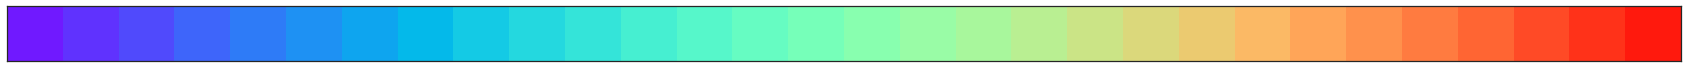

In [370]:
color = sns.color_palette('rainbow', len(f)+10).as_hex()
sns.palplot(color)

In [378]:
sns.set(style='white',  font='sans-serif', font_scale=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ref_mOTU_v2_0531_CTR v.s. ref_mOTU_v2_0531_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.108e-13 U_stat=2.966e+04
ref_mOTU_v2_0148_CTR v.s. ref_mOTU_v2_0148_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.749e-05 U_stat=3.696e+04
ref_mOTU_v2_1145_CTR v.s. ref_mOTU_v2_1145_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=5.340e-23 U_stat=2.406e+04
ref_mOTU_v2_0143_CTR v.s. ref_mOTU_v2_0143_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.323e-04 U_stat=3.534e+04
ref_mOTU_v2_4064_CTR v.s. ref_mOTU_v2_4064_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=6.618e-02 U_stat=3.979e+04
ref_mOTU_v2_1517_CTR v.s. ref_mOTU_v2_1517_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.356e-09 U_stat=3.426e+04
ref_mOTU_v2_2101_CTR v.s. ref_mOTU_v2_2101_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=8.846e-10 U_stat=3.530e+04
ref

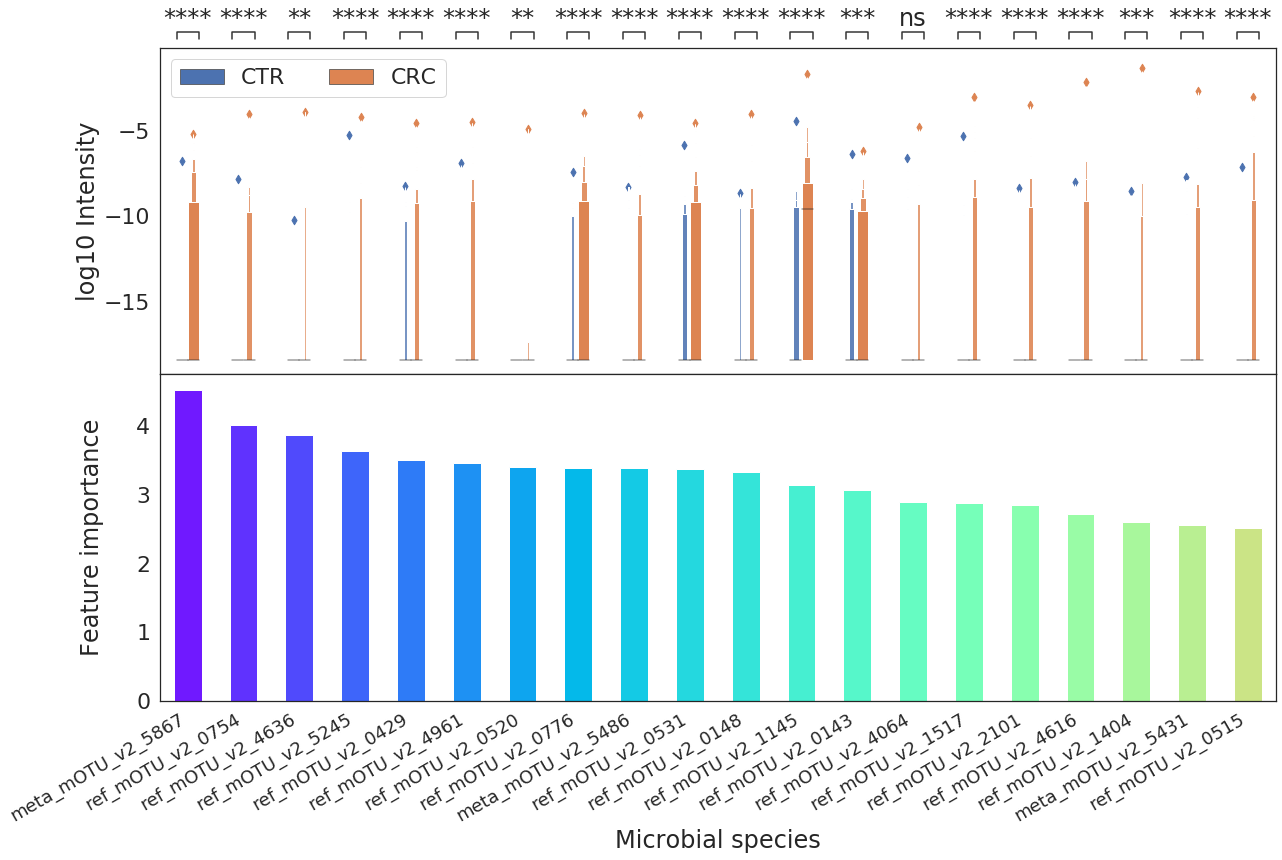

In [394]:
fig, ax  = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax, ax2 = ax
# g = sns.swarmplot(x=x, y=y, hue = hue, data=data, color= ".2", order = order, ax= ax, size = 6,
#                      split=True,   linewidth=1, edgecolor='gray') #palette="Set2",palette = [".8", ".8"] jitter=True,
    
flierprops = dict(marker = 'o',markerfacecolor='0.75', markersize=5, linestyle='none')
    
sns.boxenplot(data = data,y=y, x = x, hue = hue,  ax = ax, width = 0.4, saturation = 1,
              #k_depth = "proportion" , scale = 'linear', 
              order = order) # palette="Set1_r", , flierprops = flierprops

ax, test_results = add_stat_annotation(ax, data=data, x=x, y=y, hue = hue, test='Mann-Whitney', 
                                       box_pairs=box_pairs, comparisons_correction=None,
                                       text_format='star', loc='outside', verbose=2)
ax.set_ylabel(y,)

#ax.set_ylim(-10, -2)


ax.legend(loc='upper left',fancybox=True,  ncol=2)

p = f['5_countries_average_importance'].tolist()
p = [{i: j} for i, j in enumerate(p)]
p = pd.DataFrame(p, index = f.index)
p.plot(kind ='bar',stacked=True, ax = ax2, color = color, legend=False, )

ax2.set_ylabel('Feature importance', labelpad = 32)
ax2.set_xlabel(x)

plt.xticks(rotation=30, ha='right', fontsize = 18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.000)

plt.savefig('statistic_test.svg', dpi=400, bbox_inches='tight')

In [443]:
from scipy.stats import mannwhitneyu

In [444]:
p_values = []
for c in df_save.index:
    if c != 0:
        v1 = dfx[[c]]
        v2 = dfy[['CTR']]
        xx = v1.join(v2).groupby('CTR')[c].apply(lambda x:x.to_list())    
        s, p = mannwhitneyu(xx[0], xx[1], alternative='two-sided')
        p_values.append(p)
    else:
        p_values.append(None)

In [445]:
df_save['mannwhitneyu_p-value'] = p_values
df_save.to_excel('./model/feature_importance.xlsx')